In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Previous_app dataset
file_path2 = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/filtered_previous_app1.csv"
previous_app = pd.read_csv(file_path2, header='infer')


In [ ]:
previous_app.shape

(291057, 35)

In [ ]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,2636178,100003,Consumer loans,61997.139,337500.0,348637.5,0.0,337500.0,SUNDAY,17,...,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
2,1564014,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0
3,2827850,100006,Revolving loans,10125.000,0.0,0.0,1845.0,94320.0,THURSDAY,15,...,Unknown,12.0,Unknown,Card Street,365243.0,748.0,315.0,455.0,418.0,0.0
4,2730157,100007,Cash loans,13010.985,225000.0,284400.0,1845.0,225000.0,FRIDAY,13,...,Unknown,48.0,middle,Cash X-Sell: middle,365243.0,748.0,315.0,455.0,418.0,0.0


In [ ]:
# Count occurrences for each class in the 'NAME_CONTRACT_STATUS' column
class_counts = previous_app['NAME_CONTRACT_STATUS'].value_counts()

# Print the counts
print(class_counts)


NAME_CONTRACT_STATUS
Approved        213847
Canceled         38785
Refused          33872
Unused offer      4553
Name: count, dtype: int64


In [ ]:
# Display column names
print("\nColumns in previous_app dataset:")
print(previous_app.columns)


Columns in previous_app dataset:
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


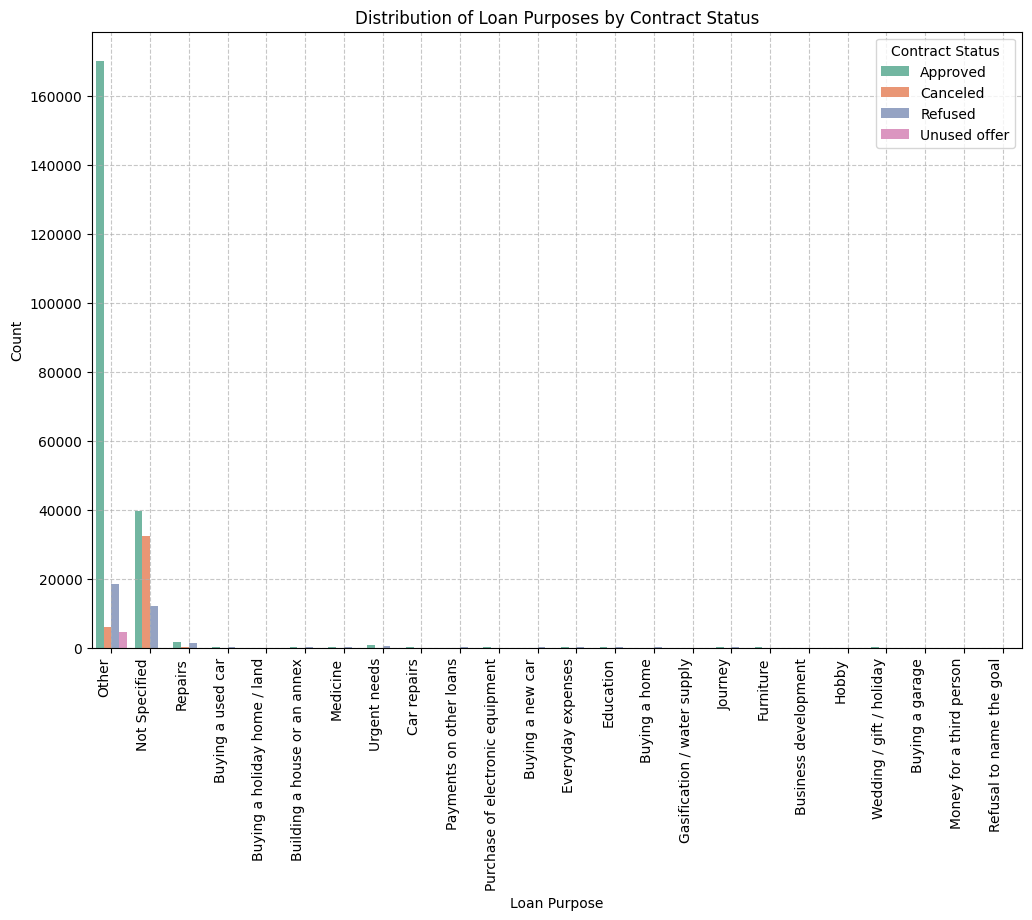

In [ ]:
# @title Distribution of Loan Purposes by Contract Status
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(data=previous_app, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', palette='Set2')

# Customize the plot
plt.title('Distribution of Loan Purposes by Contract Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Contract Status')
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# Show the plot
plt.show()

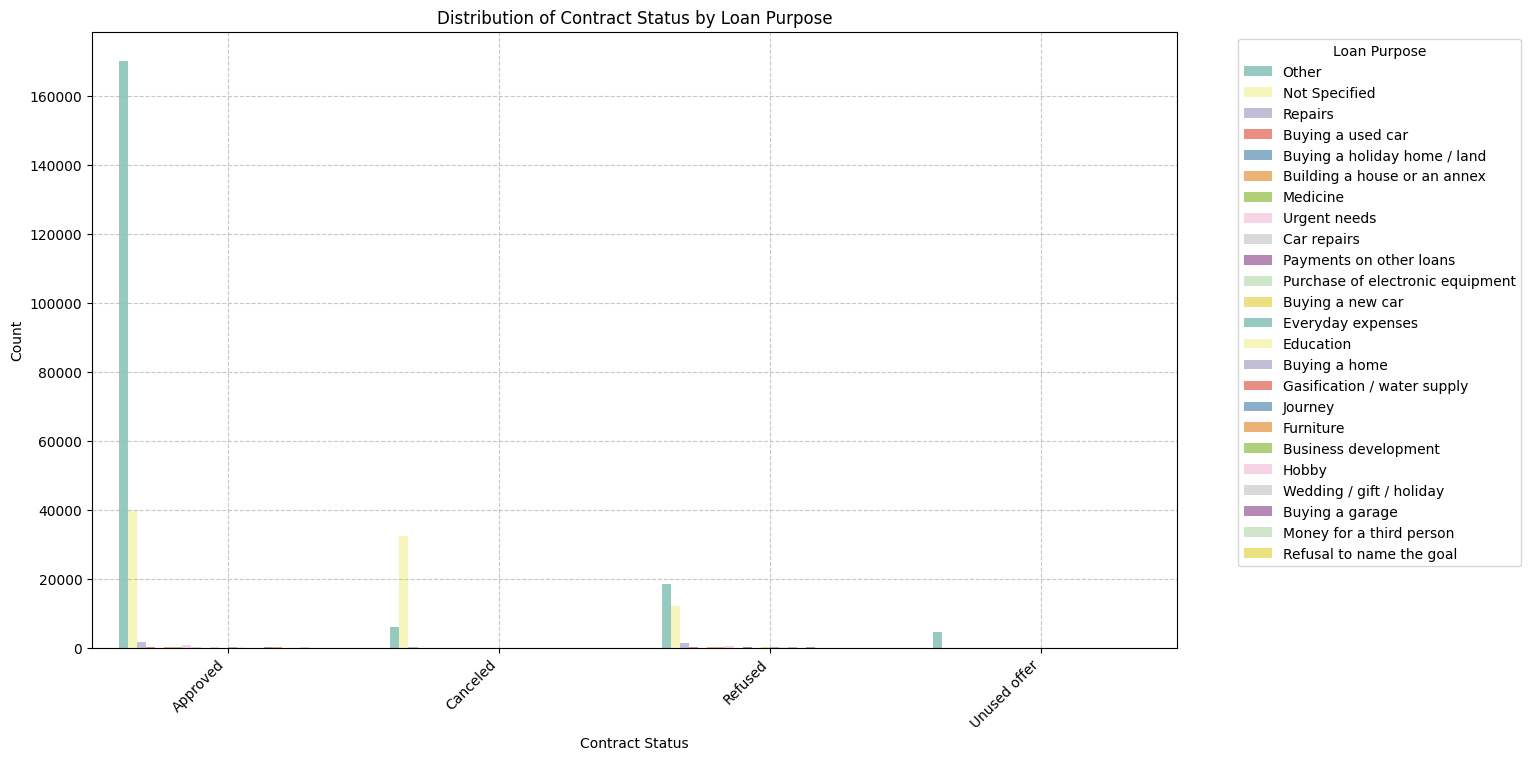

In [ ]:
# @title Distribution of Contract Status by Loan Purpose
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a count plot
sns.countplot(data=previous_app, x='NAME_CONTRACT_STATUS', hue='NAME_CASH_LOAN_PURPOSE', palette='Set3')

# Customize the plot
plt.title('Distribution of Contract Status by Loan Purpose')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Loan Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# Show the plot
plt.show()

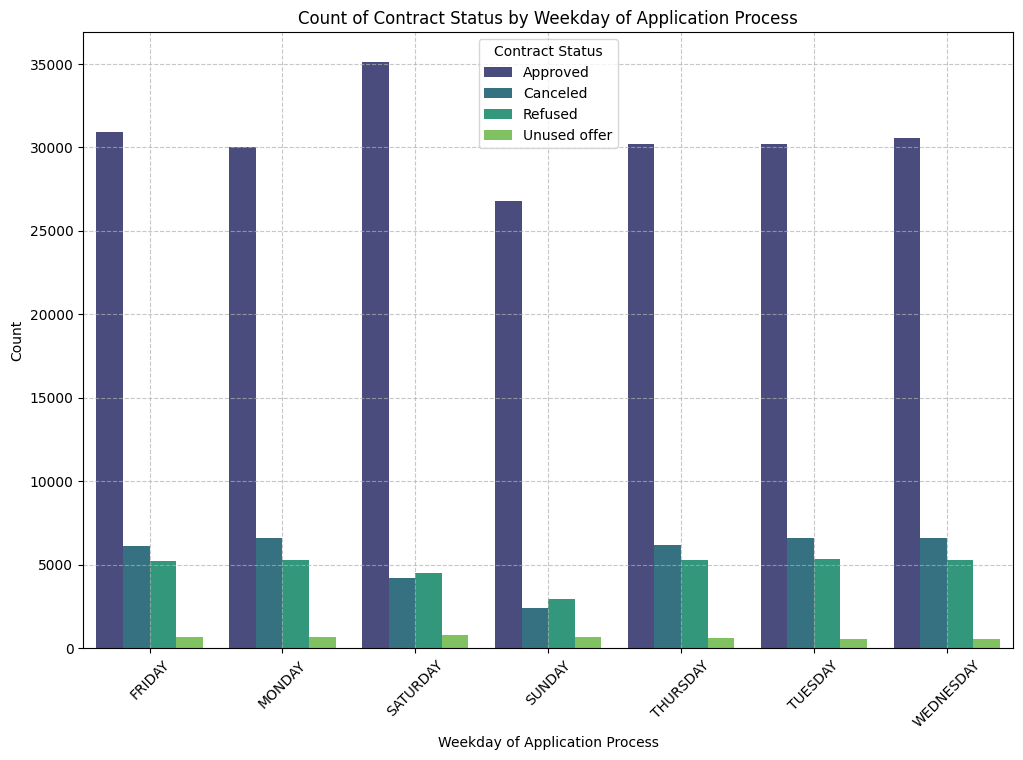

In [ ]:
# @title Count of Contract Status by Weekday of Application Process
# Create a DataFrame for visualization
data = previous_app.groupby(['WEEKDAY_APPR_PROCESS_START', 'NAME_CONTRACT_STATUS']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='WEEKDAY_APPR_PROCESS_START', y='Count', hue='NAME_CONTRACT_STATUS', palette="viridis")

# Customize the plot
plt.title('Count of Contract Status by Weekday of Application Process')
plt.xlabel('Weekday of Application Process')
plt.ylabel('Count')
plt.legend(title='Contract Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# Show the plot
plt.show()

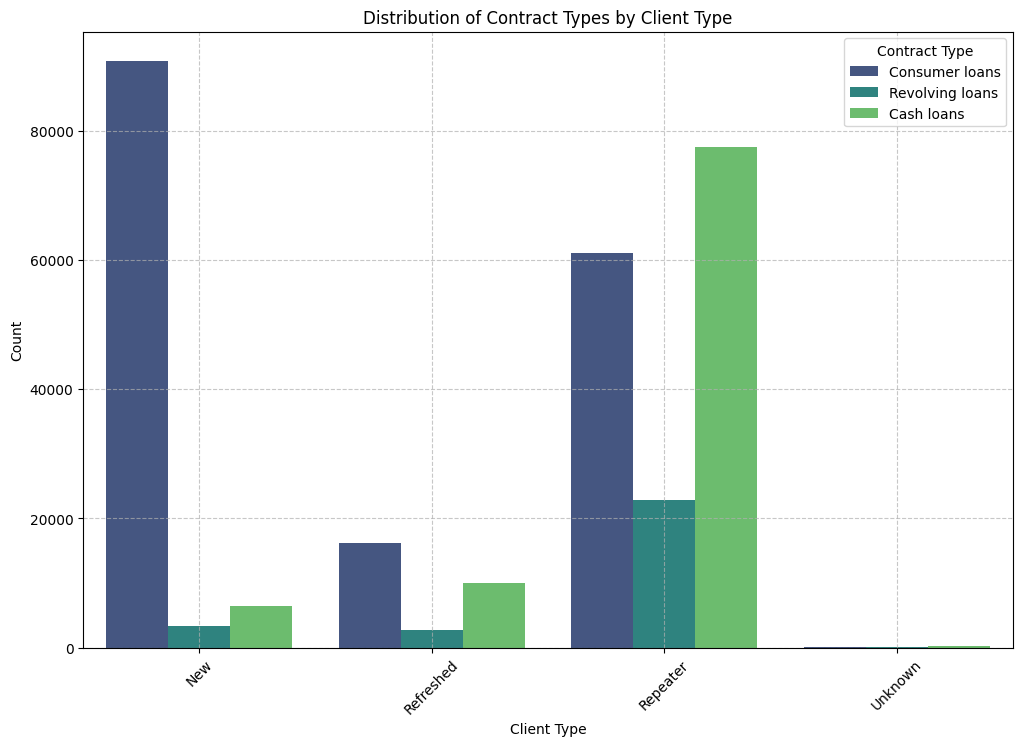

In [ ]:
# @title Count of Distribution of Contract Types by Client Type
# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=previous_app, x='NAME_CLIENT_TYPE', hue='NAME_CONTRACT_TYPE', palette='viridis')

# Customize the plot
plt.title('Distribution of Contract Types by Client Type')
plt.xlabel('Client Type')
plt.ylabel('Count')
plt.legend(title='Contract Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability

# Show the plot
plt.show()

In [ ]:
NAME_CONTRACT = {
    'Consumer loans': 1,
    'Cash loans': 2,
    'Revolving loans': 3,
}
previous_app['NAME_CONTRACT_TYPE'] = previous_app['NAME_CONTRACT_TYPE'].replace(NAME_CONTRACT)

WEEKDAY_APPR_PROCESS = {
    'MONDAY': 1,
    'TUESDAY': 2,
    'WEDNESDAY': 3,
    'THURSDAY': 4,
    'FRIDAY': 5,
    'SATURDAY': 6,
    'SUNDAY': 7
}
previous_app['WEEKDAY_APPR_PROCESS_START'] = previous_app['WEEKDAY_APPR_PROCESS_START'].replace(WEEKDAY_APPR_PROCESS)

FLAG_LAST_APPL = {
    'Y': 0,
    'N': 1
}
previous_app['FLAG_LAST_APPL_PER_CONTRACT'] = previous_app['FLAG_LAST_APPL_PER_CONTRACT'].replace(FLAG_LAST_APPL)

NAME_CASH_LOAN = {
    'Repairs': 1,
    'Buying a holiday home / land' :2,
    'Building a house or an annex': 3,
    'Urgent needs': 4,
    'Car repairs': 5,
    'Buying a new car':6,
    'Medicine': 7,
    'Furniture': 8,
    'Education':9,
    'Buying a used car': 10,
    'Purchase of electronic equipment':11,
    'Everyday expenses': 12,
    'Wedding / gift / holiday': 13,
    'Payments on other loans':14,
    'Buying a home': 15,
    'Gasification / water supply':16 ,
    'Business development':17,
    'Journey': 18,
    'Buying a garage':19,
    'Hobby':20 ,
    'Money for a third person' :21,
    'Refusal to name the goal' :22,
    'Other': 24,
    'Not Specified': 24

}
previous_app['NAME_CASH_LOAN_PURPOSE'] = previous_app['NAME_CASH_LOAN_PURPOSE'].replace(NAME_CASH_LOAN)

CONTRACT_STATUS = {
    'Approved': 1,
    'Refused': 2,
    'Canceled': 3,
    'Unused offer':4
}
previous_app['NAME_CONTRACT_STATUS'] = previous_app['NAME_CONTRACT_STATUS'].replace(CONTRACT_STATUS)

NAME_PAYMENT = {
    'Cash through the bank': 1,
    'Non-cash from your account': 2,
    'Cashless from the account of the employer': 3,
    'Unknown' : 4
}
previous_app['NAME_PAYMENT_TYPE'] = previous_app['NAME_PAYMENT_TYPE'].replace(NAME_PAYMENT)

CODE_REJECT = {
    'Accepted After Initial Rejection':1,
    'LIMIT':2,
    'HC':3,
    'SCO':4,
    'SCOFR':5,
    'VERIF':6,
    'CLIENT':7,
    'SYSTEM':8,
    'Not Available':9
}
previous_app['CODE_REJECT_REASON'] = previous_app['CODE_REJECT_REASON'].replace(CODE_REJECT)

NAME_SUITE = {
    'Unaccompanied':1,
    'Spouse, partner':2,
    'Family':3,
    'Children':4,
    'Group of people':5,
    'Other_A':6,
    'Other_B':7,
    'Unknown':8
}
previous_app['NAME_TYPE_SUITE'] = previous_app['NAME_TYPE_SUITE'].replace(NAME_SUITE)

NAME_CLIENT = {
    'New':1,
    'Repeater':2,
    'Refreshed':3,
    'Unknown':4
}
previous_app['NAME_CLIENT_TYPE'] = previous_app['NAME_CLIENT_TYPE'].replace(NAME_CLIENT)

NAME_GOODS = {
    'Vehicles':1,
    'Mobile':2,
    'Consumer Electronics':3,
    'Furniture':4,
    'Audio/Video':5,
    'Computers':6,
    'Clothing and Accessories':7,
    'Construction Materials':8,
    'Photo / Cinema Equipment':9,
    'Homewares':10,
    'Gardening':11,
    'Jewelry':12,
    'Auto Accessories':13,
    'Medicine':14,
    'Office Appliances':15,
    'Tourism':16,
    'Weapon':17,
    'Sport and Leisure':18,
    'Fitness':19,
    'Medical Supplies':20,
    'Direct Sales':21,
    'Education' :22,
    'Insurance':23,
    'Additional Service':24,
    'Animals':25,
    'Not Specified' :26,
    'Other' :27
}
previous_app['NAME_GOODS_CATEGORY'] = previous_app['NAME_GOODS_CATEGORY'].replace(NAME_GOODS)

NAME_PORTFOLIO = {
    'Cash':1,
    'Cards':2,
    'Cars':3,
    'POS':4,
    'Unknown':5
}
previous_app['NAME_PORTFOLIO'] = previous_app['NAME_PORTFOLIO'].replace(NAME_PORTFOLIO)

NAME_PRODUCT = {
    'walk-in':1,
    'x-sell':2,
    'Unknown':3
}
previous_app['NAME_PRODUCT_TYPE'] = previous_app['NAME_PRODUCT_TYPE'].replace(NAME_PRODUCT)

CHANNEL_TYPE = {
    'Stone':1,
    'Credit and cash offices':2,
    'Regional / Local':3,
    'Country-wide':4,
    'AP+ (Cash loan)':5,
    'Channel of corporate sales':6,
    'Contact center':7,
    'Car dealer':8
}
previous_app['CHANNEL_TYPE'] = previous_app['CHANNEL_TYPE'].replace(CHANNEL_TYPE)

NAME_INDUSTRY = {
    'Auto technology':1,
    'Connectivity':2,
    'Consumer electronics':3,
    'Furniture':4,
    'Clothing':5,
    'Construction':6,
    'Industry':7,
    'Jewelry':8,
    'Tourism':9,
    'MLM partners':10,
    'Unknown':11
}
previous_app['NAME_SELLER_INDUSTRY'] = previous_app['NAME_SELLER_INDUSTRY'].replace(NAME_INDUSTRY)

NAME_YIELD = {
    'low_normal':1,
    'middle':2,
    'high':3,
    'low_action':4,
    'Unknown':5
}
previous_app['NAME_YIELD_GROUP'] = previous_app['NAME_YIELD_GROUP'].replace(NAME_YIELD)

PRODUCT_COMBINATION = {
   'Cash X-Sell: low':1,
   'Cash Street: high':2,
   'Cash Street: low':3,
   'Cash X-Sell: high': 4,
   'Cash X-Sell: middle':5,
   'Cash Street: middle':6,
   'POS mobile without interest':7,
   'POS other with interest':8,
   'POS household with interest':9,
   'POS household without interest':10,
   'POS industry without interest': 11,
   'POS mobile with interest':12,
   'POS industry with interest': 13,
   'POS others without interest':14,
   'Cash' :15,
   'Card X-Sell':16,
   'Card Street':17
}
previous_app['PRODUCT_COMBINATION'] = previous_app['PRODUCT_COMBINATION'].replace(PRODUCT_COMBINATION)


In [ ]:
previous_app.shape

(291057, 35)

In [ ]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1038818,100002,1,9251.775,179055.0,179055.0,0.0,179055.0,6,9,...,1,24.0,1,8,365243.0,565.0,125.0,25.0,17.0,0.0
1,2636178,100003,1,61997.139,337500.0,348637.5,0.0,337500.0,7,17,...,4,6.0,2,13,365243.0,797.0,647.0,647.0,639.0,0.0
2,1564014,100004,1,5357.250,24282.0,20106.0,4860.0,24282.0,5,5,...,2,4.0,2,7,365243.0,784.0,694.0,724.0,714.0,0.0
3,2827850,100006,3,10125.000,0.0,0.0,1845.0,94320.0,4,15,...,11,12.0,5,17,365243.0,748.0,315.0,455.0,418.0,0.0
4,2730157,100007,2,13010.985,225000.0,284400.0,1845.0,225000.0,5,13,...,11,48.0,2,5,365243.0,748.0,315.0,455.0,418.0,0.0


In [ ]:
# Display column names
print("\nColumns in previous_app dataset:")
print(previous_app.columns)


Columns in previous_app dataset:
Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


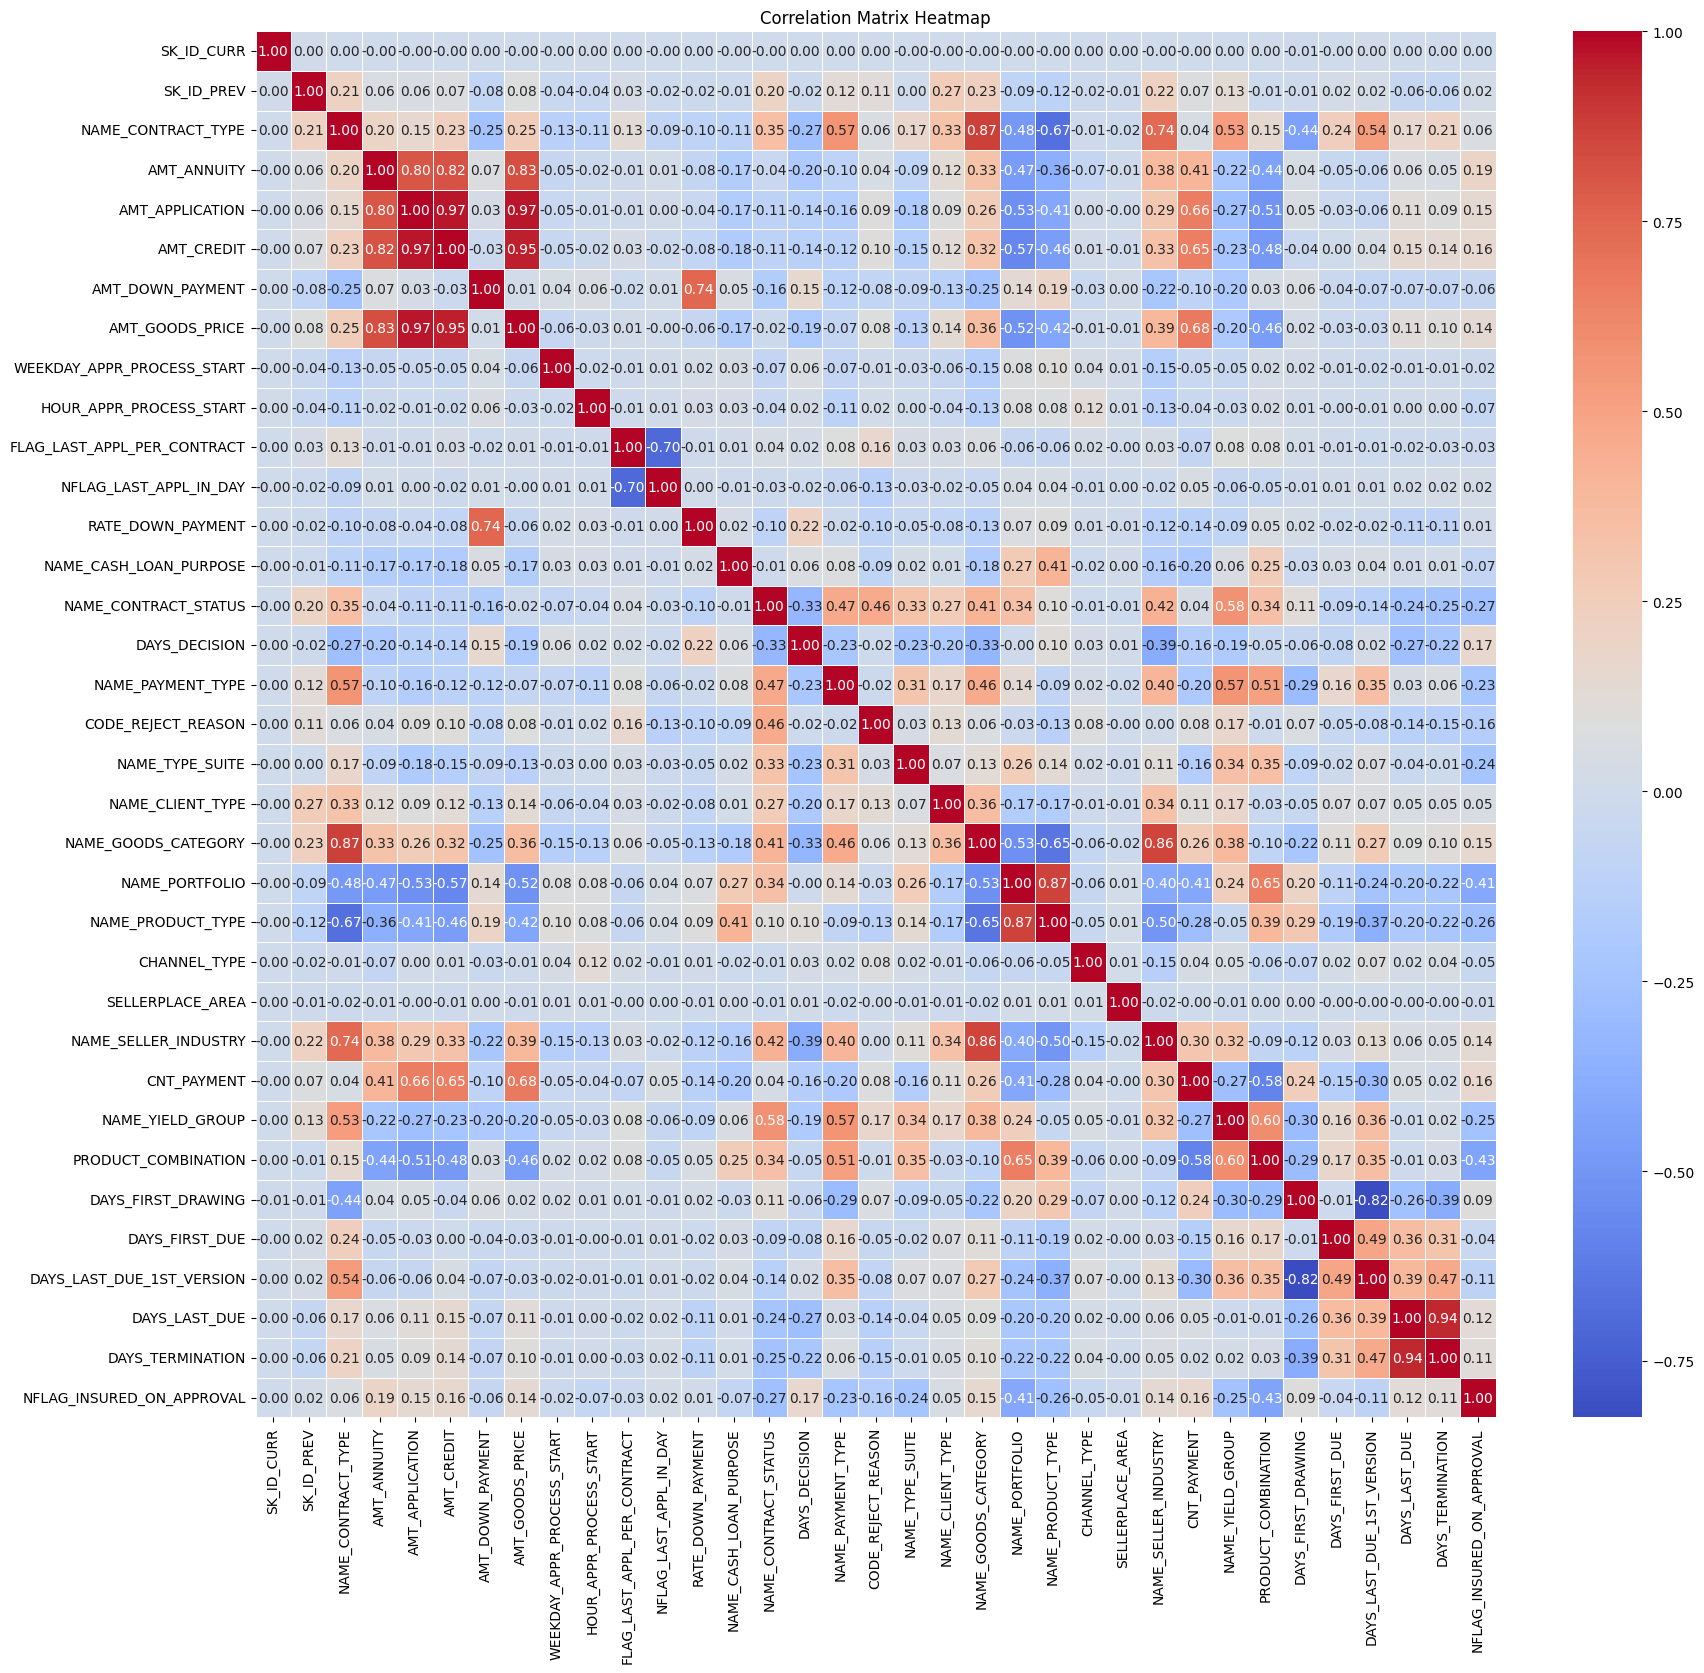

In [ ]:
# Define the first set of columns
columns_set_1 = [
    'SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'
]

# Filter the DataFrame to include only the relevant columns
df_set_1 = previous_app[columns_set_1]

# Compute the correlation matrix
correlation_matrix_1 = df_set_1.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))  # Adjust the size as needed
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

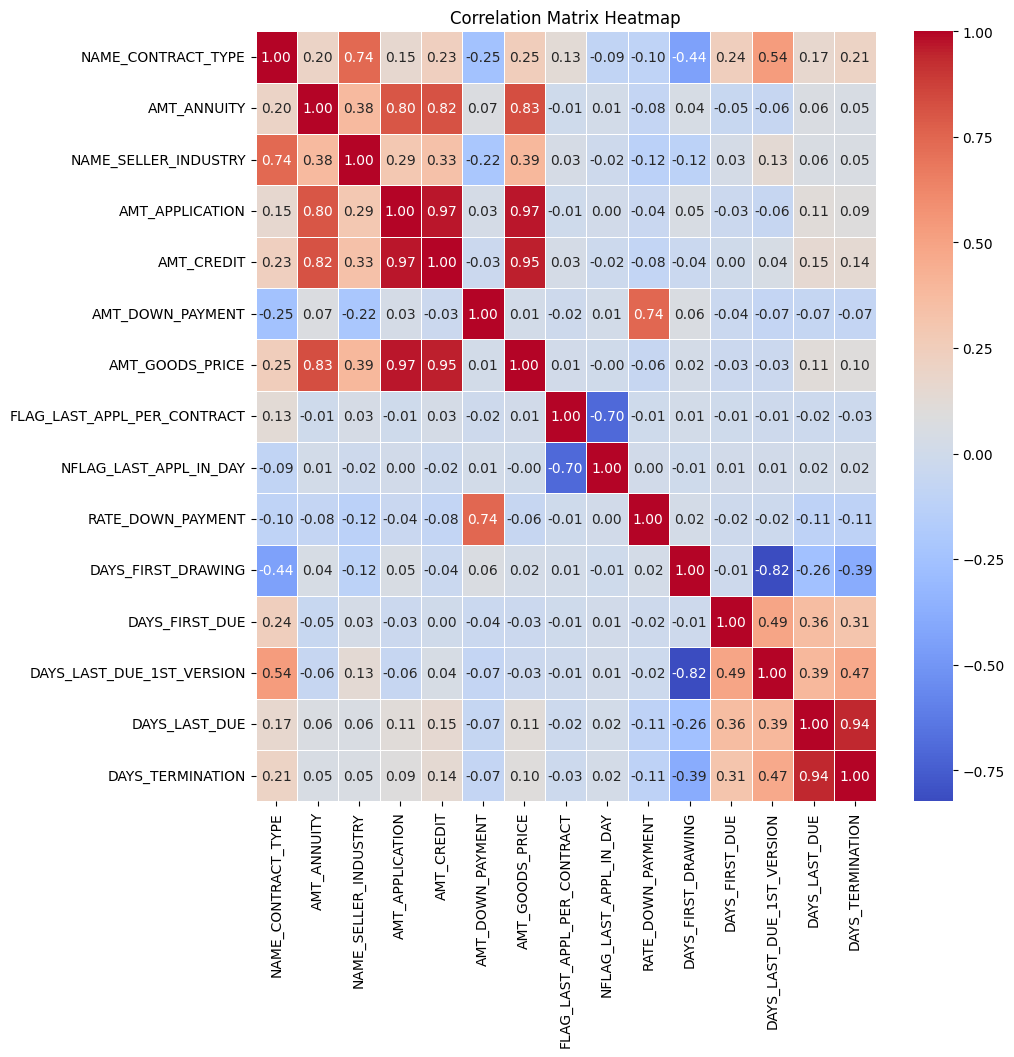

In [ ]:
# Define the first set of columns
columns_set_1 = [
     'NAME_CONTRACT_TYPE', 'AMT_ANNUITY','NAME_SELLER_INDUSTRY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT',  'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION'
]
# Filter the DataFrame to include only the relevant columns
df_set_1 = previous_app[columns_set_1]

# Compute the correlation matrix
correlation_matrix_1 = df_set_1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))  # Adjust the size as needed
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#AMT_ANNUITY Vs AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
#NAME_CONTRACT_TYPE Vs NAME_GOODS_CATEGORY, NAME_SELLER_INDUSTRY
#AMT_DOWN_PAYMENT Vs RATE_DOWN_PAYMENT
#'DAYS_LAST_DUE' Vs 'DAYS_TERMINATION' (positvie)
# 'FLAG_LAST_APPL_PER_CONTRACT' VS 'NFLAG_LAST_APPL_IN_DAY',
# 'DAYS_FIRST_DRAWING' Vs 'DAYS_LAST_DUE_1ST_VERSION' (Negative)

In [ ]:
'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',''

('AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 '')

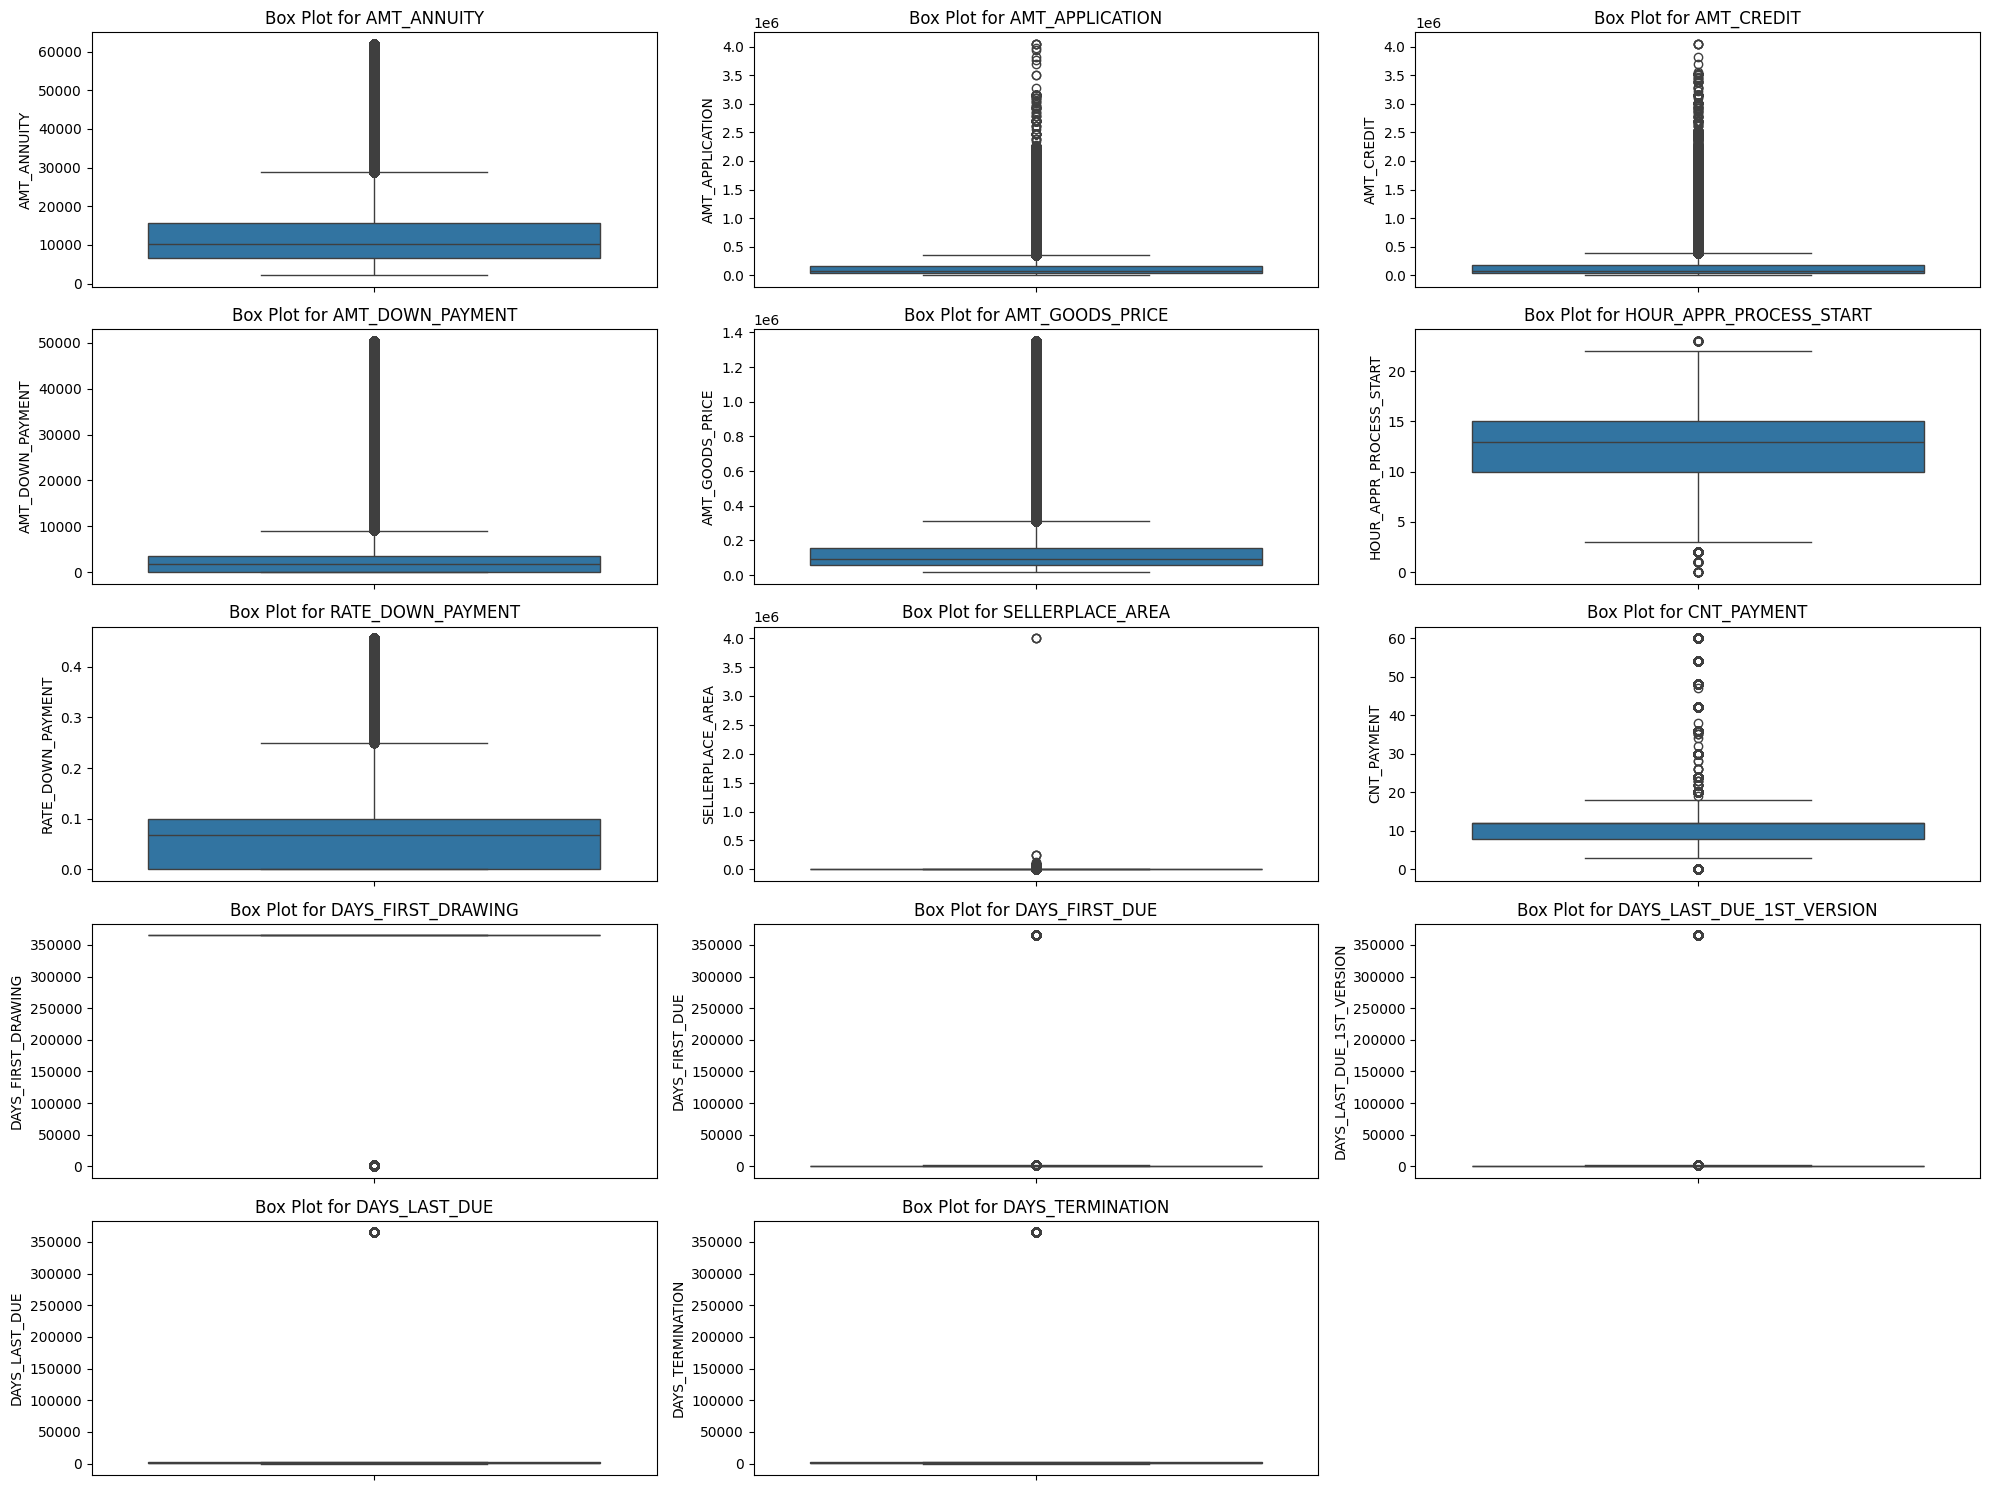

In [ ]:
# List of numerical columns to visualize for outliers
numerical_columns = [
    'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT',
    'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
    'DAYS_TERMINATION'
]

# Plot box plots for each numerical column to detect outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns):
    plt.subplot(5, 3, i+1)  # Adjust the number of rows and columns based on the number of attributes
    sns.boxplot(data=previous_app, y=col)
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()

plt.show()

In [ ]:
# 'NAME_CONTRACT_TYPE' ,'AMT_ANNUITY','AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT',NAME_GOODS_CATEGORY',
     #  'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT','DAYS_LAST_DUE','DAYS_TERMINATION','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DRAWING'

In [ ]:
# List of columns to handle outliers
outlier_columns = [
    'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT',
    'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
    'DAYS_TERMINATION'
]

# Function to handle outliers using the IQR method
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the lower or upper bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Apply the function to handle outliers in the previous_app dataset
previous_app = handle_outliers(previous_app, outlier_columns)

# Verify if outliers are handled by checking the summary statistics
print(previous_app[outlier_columns].describe())

         AMT_ANNUITY  AMT_APPLICATION     AMT_CREDIT  AMT_DOWN_PAYMENT  \
count  291057.000000    291057.000000  291057.000000     291057.000000   
mean    12187.772049    111657.348223  124393.987649       2815.699425   
std      7687.460493    110808.036823  124045.530540       3090.678958   
min      2181.706200         0.000000       0.000000          0.000000   
25%      6669.810000     29200.500000   32355.000000          0.000000   
50%     10125.000000     73575.000000   79753.500000       1845.000000   
75%     15547.275000    157500.000000  175500.000000       3640.500000   
max     28863.472500    349949.250000  390217.500000       9101.250000   

       AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  RATE_DOWN_PAYMENT  \
count    291057.000000            291057.000000      291057.000000   
mean     122933.834453                12.656875           0.070283   
std       89824.550045                 3.369127           0.063450   
min       16155.000000                 2.500000      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN  # For balancing the data
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define features and target
features = [
    'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
    'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY',
    'CNT_PAYMENT', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DRAWING'
]

target = 'NAME_CONTRACT_STATUS'

# Split the dataset into features and target
X = previous_app[features]
y = previous_app[target]

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Standardize features for training, validation, and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Binarize the output labels for multi-class ROC computation (for AUC evaluation)
class_labels = np.unique(y).astype(str)
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Define hyperparameters for tuning
param_grids = {
    "Logistic Regression": {
        'model__C': [0.1, 1, 10],
        'model__solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    }
}

# Define models with class weights to handle class imbalance
models = {
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Logistic Regression
Confusion Matrix (Test Set):
[[30593  8260  3815    72]
 [  804  2286  3312   320]
 [    2  1159  6661     4]
 [   29     1     0   894]]
Mean Absolute Error: 0.37995602281316565
Mean Squared Error: 0.5325362468219611
Root Mean Squared Error: 0.7297508114568706
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.97      0.72      0.82     42740
           2       0.20      0.34      0.25      6722
           3       0.48      0.85      0.62      7826
           4       0.69      0.97      0.81       924

    accuracy                           0.69     58212
   macro avg       0.59      0.72      0.62     58212
weighted avg       0.81      0.69      0.73     58212

Accuracy (Test Set): 0.6945990517419088
AUC (Test Set): 0.8843750988623812


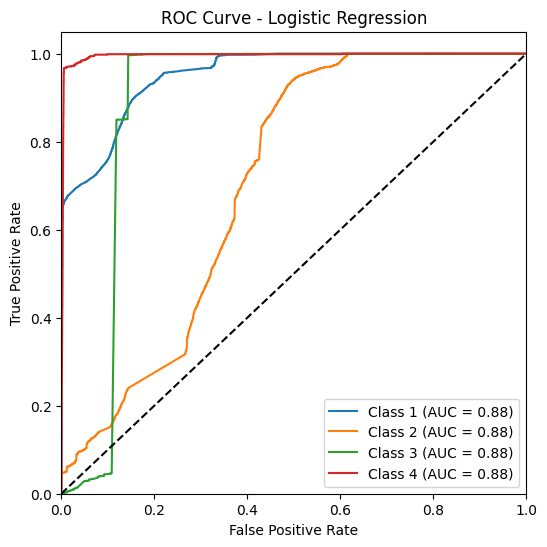


Decision Tree
Confusion Matrix (Test Set):
[[41649   688   384    19]
 [  119  4643  1631   329]
 [    2  6337  1486     1]
 [    4    22     2   896]]
Mean Absolute Error: 0.17730021301449872
Mean Squared Error: 0.20499209784924072
Root Mean Squared Error: 0.45276053035709807
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      0.97      0.99     42740
           2       0.40      0.69      0.50      6722
           3       0.42      0.19      0.26      7826
           4       0.72      0.97      0.83       924

    accuracy                           0.84     58212
   macro avg       0.63      0.71      0.64     58212
weighted avg       0.85      0.84      0.83     58212

Accuracy (Test Set): 0.8361506218649076
AUC (Test Set): 0.964563315068163


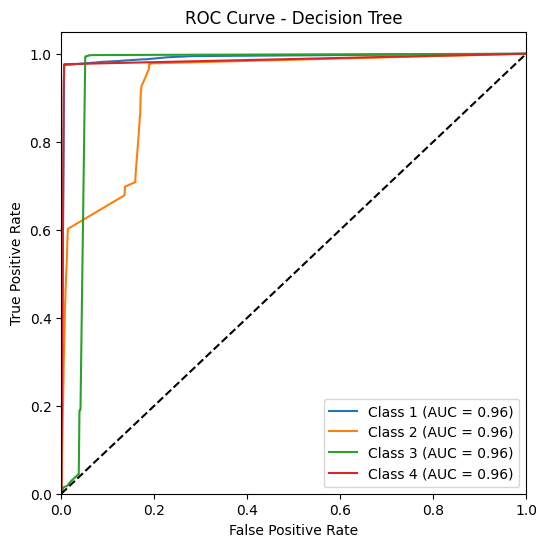

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Random Forest
Confusion Matrix (Test Set):
[[41625   678   416    21]
 [   16  4685  1690   331]
 [    1  6329  1495     1]
 [    0    19     0   905]]
Mean Absolute Error: 0.17712842712842713
Mean Squared Error: 0.2056448842163128
Root Mean Squared Error: 0.4534808531970372
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      0.97      0.99     42740
           2       0.40      0.70      0.51      6722
           3       0.42      0.19      0.26      7826
           4       0.72      0.98      0.83       924

    accuracy                           0.84     58212
   macro avg       0.63      0.71      0.65     58212
weighted avg       0.85      0.84      0.83     58212

Accuracy (Test Set): 0.8367690510547653
AUC (Test Set): 0.971203878094806


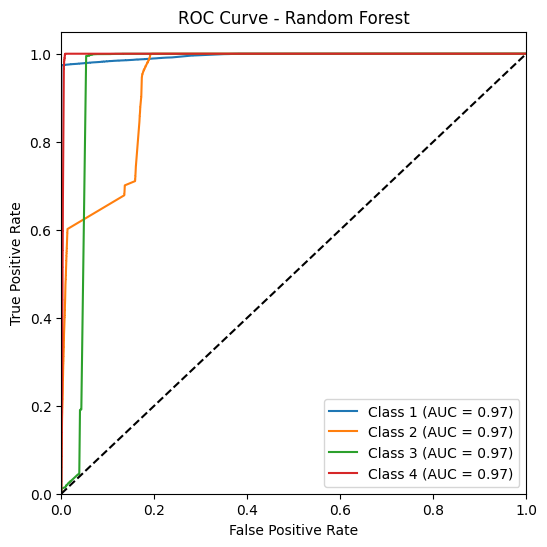

In [ ]:
# @title Train and evaluate models with hyperparameter tuning

from sklearn.exceptions import NotFittedError

for name, model in models.items():
    try:
        # Create a pipeline with SMOTE and the model (use SMOTE instead of ADASYN for stability)
        pipeline = Pipeline([
            ('sampling', SMOTE(random_state=42)),  # Replace with SMOTE for balancing
            ('scaler', StandardScaler()),  # Standardizing the data
            ('model', model)
        ])

        # Set up GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, error_score='raise')

        # Fit the model on the balanced training set
        grid_search.fit(X_train_balanced, y_train_balanced)

        # Get the best model from the grid search
        best_model = grid_search.best_estimator_

        # Predict on the test set
        y_pred = best_model.predict(X_test)

        print(f"\n{name}")
        print("Confusion Matrix (Test Set):")
        print(confusion_matrix(y_test, y_pred))

        # Calculate and print errors
        print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

        # Classification report for each class
        print("Classification Report (Test Set):")
        print(classification_report(y_test.astype(str), y_pred.astype(str), target_names=class_labels))

        # Accuracy of the model
        print("Accuracy (Test Set):", accuracy_score(y_test, y_pred))

        # AUC score for multi-class models (if applicable)
        if hasattr(best_model, "predict_proba"):
            y_pred_proba = best_model.predict_proba(X_test)
            auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
            print("AUC (Test Set):", auc)

            # Plot ROC curve for each class
            plt.figure(figsize=(6, 6))
            for i in range(len(class_labels)):
                fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
                plt.plot(fpr, tpr, label=f"Class {class_labels[i]} (AUC = {auc:.2f})")

            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc="lower right")
            plt.show()
        else:
            print("AUC: Not applicable for this model")

    except NotFittedError as e:
        print(f"Model {name} could not be fitted: {e}")
    except ValueError as e:
        print(f"ValueError for {name}: {e}")


In [ ]:
# @title Cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

# Define cross-validation strategy (StratifiedKFold for class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for name, model in models.items():
    # Cross-validation accuracy
    scores = cross_val_score(model, X_val, y_val, cv=cv, scoring='accuracy')
    y_pred_cv = cross_val_predict(model, X_val, y_val, cv=cv)

    print(f"\n{name} - Cross-Validation:")
    print("Cross-validated Accuracy:", scores.mean(), "+/-", scores.std() * 2)

    # Classification report during cross-validation
    print("Classification Report (Cross-Validation):")
    print(classification_report(y_val, y_pred_cv))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression - Cross-Validation:
Cross-validated Accuracy: 0.7736166515303096 +/- 0.004918718891765306
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           1       0.96      0.75      0.84     42799
           2       0.30      0.68      0.42      6827
           3       0.92      0.96      0.94      7688
           4       0.72      0.95      0.82       897

    accuracy                           0.77     58211
   macro avg       0.73      0.83      0.75     58211
weighted avg       0.88      0.77      0.81     58211


Decision Tree - Cross-Validation:
Cross-validated Accuracy: 0.9480166650576403 +/- 0.003826775549186127
Classification Report (Cross-Validation):
              precision    recall  f1-score   support

           1       0.99      0.98      0.98     42799
           2       0.79      0.77      0.78      6827
           3       0.91      0.96      0.93      7688
           4       0.72      0.73      0.73     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression - Test Set Evaluation:
Confusion Matrix (Test Set):
[[30679  8189  3784    88]
 [  841  2226  3333   322]
 [    2  1160  6659     5]
 [   29     1     0   894]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.97      0.72      0.83     42740
           2       0.19      0.33      0.24      6722
           3       0.48      0.85      0.62      7826
           4       0.68      0.97      0.80       924

    accuracy                           0.70     58212
   macro avg       0.58      0.72      0.62     58212
weighted avg       0.81      0.70      0.73     58212

Accuracy (Test Set): 0.6950113378684807
AUC (Test Set): 0.89


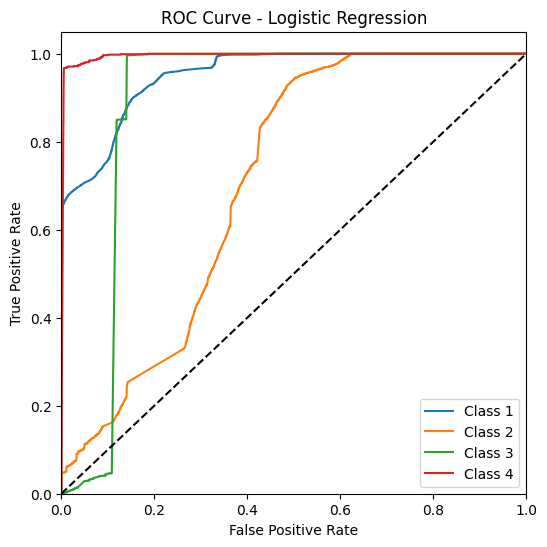


Decision Tree - Test Set Evaluation:
Confusion Matrix (Test Set):
[[41739   674   315    12]
 [  383  4739  1326   274]
 [   22  6365  1438     1]
 [    4   185     2   733]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.99      0.98      0.98     42740
           2       0.40      0.70      0.51      6722
           3       0.47      0.18      0.26      7826
           4       0.72      0.79      0.75       924

    accuracy                           0.84     58212
   macro avg       0.64      0.66      0.63     58212
weighted avg       0.85      0.84      0.83     58212

Accuracy (Test Set): 0.8357211571497286
AUC (Test Set): 0.93


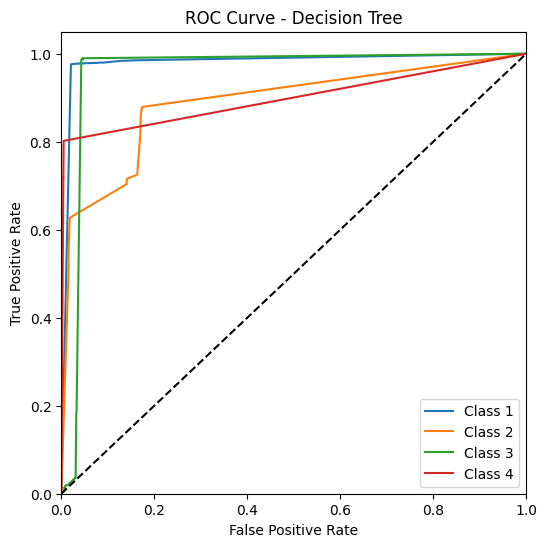


Random Forest - Test Set Evaluation:
Confusion Matrix (Test Set):
[[41676   737   315    12]
 [  117  5014  1313   278]
 [   18  6372  1435     1]
 [    0   186     0   738]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           1       1.00      0.98      0.99     42740
           2       0.41      0.75      0.53      6722
           3       0.47      0.18      0.26      7826
           4       0.72      0.80      0.76       924

    accuracy                           0.84     58212
   macro avg       0.65      0.68      0.63     58212
weighted avg       0.85      0.84      0.83     58212

Accuracy (Test Set): 0.8393973751116608
AUC (Test Set): 0.97


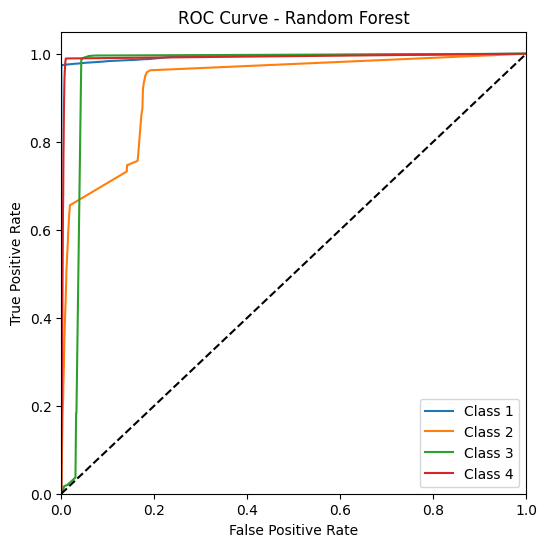

In [ ]:
# @title Test the model with the test data set (unseen)

for name, model in models.items():
    # Ensure the model has been fitted before testing on unseen data
    model.fit(X_train_balanced, y_train_balanced)  # Ensure the model is trained

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    print(f"\n{name} - Test Set Evaluation:")

    # Confusion Matrix
    print("Confusion Matrix (Test Set):")
    print(confusion_matrix(y_test, y_test_pred))

    # Classification report for the test set
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Accuracy
    print("Accuracy (Test Set):", accuracy_score(y_test, y_test_pred))

    # AUC score for multi-class (if applicable)
    if hasattr(model, "predict_proba"):
        # Predict the probability scores for each class
        y_test_pred_proba = model.predict_proba(X_test)

        # Binarize the test labels for multi-class AUC computation
        y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

        # Compute AUC score using One-vs-Rest (ovr) strategy for multi-class
        auc_score_test = roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class='ovr', average='macro')

        print(f"AUC (Test Set): {auc_score_test:.2f}")

        # Plot ROC curve for each class
        plt.figure(figsize=(6, 6))
        for i in range(len(np.unique(y_test))):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
            plt.plot(fpr, tpr, label=f"Class {np.unique(y_test)[i]}")

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

    else:
        print("AUC: Not applicable for this model")
